<a href="https://colab.research.google.com/github/A-Kutscher/Project-2/blob/main/Project_2_Cirrhosis_AK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Liver Cirrhosis Dataset Prediction**
Author: Amber Kutscher

##**Introduction**

### Dataset Source

The [Cirrhosis Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset) used for this analysis is taken from Kaggle.

### Dataset Details

Cirrhosis refers to an advanced stage of liver scarring or fibrosis, often caused by various liver conditions such as hepatitis and chronic alcohol misuse.

The provided data pertains to insights gained from the Mayo Clinic trial focused on primary biliary cirrhosis (PBC) of the liver. This trial was conducted between 1974 and 1984. In-depth clinical context for the trial and the factors measured here can be found in Chapter 0, particularly Section 0.2 of Fleming and Harrington's work titled "Counting Processes and Survival Analysis," published by Wiley in 1991. More comprehensive discussions are available in the works of Dickson et al., in their publication "Hepatology 10:1-7 (1989)," and Markus et al., in "N Eng J of Med 320:1709-13 (1989)."

A total of 424 PBC patients, attended to at the Mayo Clinic during the specified decade, met the eligibility criteria for the randomized placebo-controlled trial featuring the drug D-penicillamine. Among this group, the initial 312 individuals actively participated in the randomized trial, providing a robust set of comprehensive data. Additionally, 112 individuals did not take part in the clinical trial itself, yet consented to fundamental measurements and subsequent survival tracking. Regrettably, due to loss of follow-up shortly after diagnosis, data is available for 106 of these cases, in conjunction with the 312 participants from the randomized trial.

### Problem

The aim is to predict cirrhosis stages in patients using data from blood and urine tests, encompassing those in treatment and new clinic arrivals. This involves applying a suitable staging system based on clinical measurements from the Mayo Clinic trial. The goal is to enhance patient care by enabling tailored treatments and timely interventions based on the severity of the ailment.

- 418 PBC patients participated in the randomized placebo-controlled trial featuring the drug D-penicillamine
  - 312 of which actively participated in the randomized trial
  - 106 of which did not participate in the randomized trial

### Data Dictionary

**1) ID:** unique identifier

**2) N_Days:** number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

**3) Status:** status of the patient C (censored), CL (censored due to liver tx), or D (death)

**4) Drug:** type of drug D-penicillamine or placebo

**5) Age:** age in [days]

**6) Sex:** M (male) or F (female)

**7) Ascites:** presence of ascites N (No) or Y (Yes)

**8) Hepatomegaly:** presence of hepatomegaly N (No) or Y (Yes)

**9) Spiders:** presence of spiders N (No) or Y (Yes)

**10) Edema:** presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

**11) Bilirubin:** serum bilirubin in [mg/dl]

**12) Cholesterol:** serum cholesterol in [mg/dl]

**13) Albumin:** albumin in [gm/dl]

**14) Copper:** urine copper in [ug/day]

**15) Alk_Phos:** alkaline phosphatase in [U/liter]

**16) SGOT:** SGOT in [U/ml]

**17) Triglycerides:** triglicerides in [mg/dl]

**18) Platelets:** platelets per cubic [ml/1000]

**19) Prothrombin:** prothrombin time in seconds [s]

**20) Stage:** histologic stage of disease (1, 2, 3, or 4)

### Questions & Answers

1. Source of data
  - [Cirrhosis Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset)

2. Brief description of data
  - Cirrhosis is a late stage of liver scarring (fibrosis) brought on by a variety of liver disorders and conditions, including prolonged alcoholism and hepatitis. The information gathered during the 1974-1984 Mayo Clinic trial on primary biliary cirrhosis (PBC) of the liver is presented here. 424 PBC patients who were referred to Mayo Clinic during the course of that ten-year period qualified for the drug D-penicillamine's randomized placebo-controlled trial. The dataset's initial 312 cases, which took part in the randomized study, include mostly complete data. Although the extra 112 individuals declined to take part in the clinical experiment, they agreed to have some basic measurements taken and to be monitored for survival. The data presented here include 312 randomized individuals as well as an extra 106 cases because six of those cases were lost to follow-up shortly after diagnosis.

3. What is the target?
  - Stage

4. What does one row represent? (A person? A business? An event? A product?)
  - Each row represents a patient (person).

5. Is this a classification or regression problem?
  - This is a regression problem.

6. How many features does the data have?
  - This dataset has 20 features.

7. How many rows are in the dataset?
  - There are 418 rows.

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - None that I can think of at the moment.

## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Data Load & Initial Inspection

In [3]:
# Load in data
fpath = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/cirrhosis[1].csv"
df = pd.read_csv(fpath)
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
# Create a copy of the dataset
df_copy = df.copy()

In [5]:
# Inspect the dataset
df.describe(include=(['int64', 'float64', 'object']))

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418,312,418.000000,418,312,312,312,418,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
unique,NaN,NaN,3,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,C,D-penicillamine,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,232,158,NaN,374,288,160,222,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,209.500000,1917.782297,NaN,NaN,18533.351675,NaN,NaN,NaN,NaN,NaN,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,NaN,NaN,3815.845055,NaN,NaN,NaN,NaN,NaN,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,NaN,NaN,9598.000000,NaN,NaN,NaN,NaN,NaN,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,NaN,NaN,15644.500000,NaN,NaN,NaN,NaN,NaN,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,NaN,NaN,18628.000000,NaN,NaN,NaN,NaN,NaN,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,NaN,NaN,21272.500000,NaN,NaN,NaN,NaN,NaN,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000


In [6]:
# Check the information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [7]:
# Identify numeric columns
numeric_features = []
for column in df.columns:
    if df[column].dtype == "int64" or df[column].dtype == "float64":
        numeric_features.append(column)

numeric_features

['ID',
 'N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [8]:
# Identify categorical columns
cat_features = []
for column in df.columns:
    if df[column].dtype == "object":
        cat_features.append(column)
cat_features

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

## Data Cleaning

### Unnecessary Columns

- 'ID' column seems to be for identification purposes only and is therefore irrelevant to our analysis.

In [9]:
# Remove any unnecessary columns
cols_to_drop = ["ID"]
df_cleaned = df.drop(columns=cols_to_drop)

### Duplicates

In [10]:
# Check for duplicated rows
df.duplicated().value_counts()

False    418
dtype: int64

- There are **no duplicates** present in this dataset.

### Inconsistent Values

- 'Age' was converted from days to years for ease of interpretation.

In [11]:
# Convert the 'Age' column to years instead of days
days_per_year = 365
df['Age'] = (df['Age'].values/days_per_year).round()
print(df['Age'].describe())

count    418.000000
mean      50.772727
std       10.442880
min       26.000000
25%       43.000000
50%       51.000000
75%       58.000000
max       78.000000
Name: Age, dtype: float64


### Missing Values

- To address the presence of missing values within our dataset:

  1) In order to reduce the impact of uncommon and far-off values (known as outliers) when they significantly deviate from the rest of the data, we will utilize the middle number (median) from the respective column to replace missing values in columns containing numbers.

  2) To address missing information in columns categorized by types, we will use the mode – the most frequently chosen option – to fill in the gaps where data is absent.

In [12]:
# List of numeric columns & null count
numeric_cols = df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
print(numeric_cols)

ID                 0
N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [13]:
# Address numeric column nulls
numeric_col_nulls = df.select_dtypes(include=('int64', 'float64')).columns
for na in numeric_col_nulls:
  df[na].fillna(df[na].median(), inplace=True)
numeric_col_nulls.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [14]:
# List of object columns & null count
object_cols = df.select_dtypes(include=(['object'])).isna().sum()
print(object_cols)

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64


In [15]:
# Addressing object column nulls
object_cols_nulls = df.select_dtypes(include='object').columns
df['Drug'].fillna('No Drug', inplace=True)
for na in object_cols_nulls:
  df[na].fillna(df[na].mode().values[0], inplace=True)
object_cols_nulls.isna()

array([False, False, False, False, False, False, False])

In [16]:
# Find each unique value in categorical columns
for column in cat_features:
    print(df[column].unique())

['D' 'C' 'CL']
['D-penicillamine' 'Placebo' 'No Drug']
['F' 'M']
['Y' 'N']
['Y' 'N']
['Y' 'N']
['Y' 'N' 'S']


In [17]:
# Check to verify that all nulls have been addressed
df.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

- All missing values have been addressed!

In [18]:
# Display cleaned data
df_cleaned = df
df_cleaned.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


##Exploratory Data Analysis

### Univariate Visualization

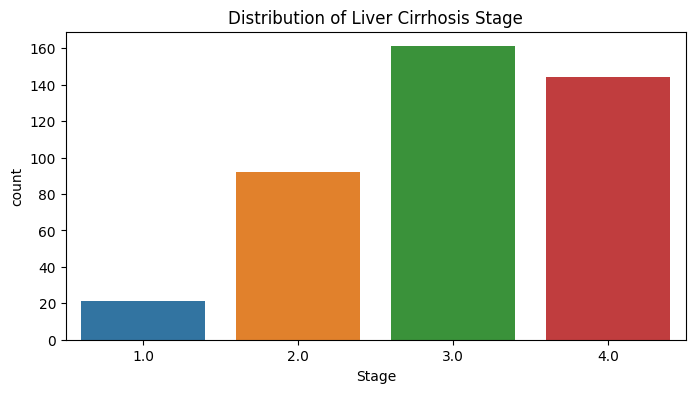

In [19]:
# Univariate visuals for target and features
plt.figure(figsize=(8, 4))
sns.countplot(x="Stage", data=df_cleaned)
plt.title("Distribution of Liver Cirrhosis Stage")
plt.show()

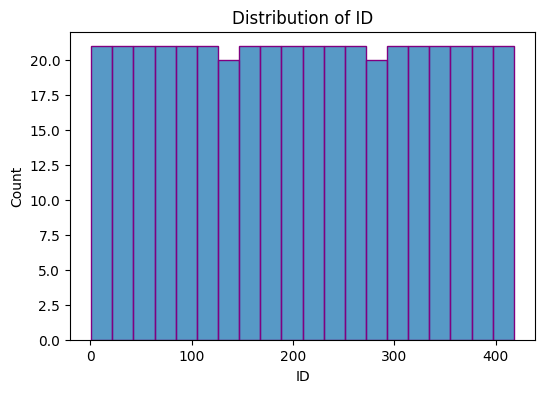

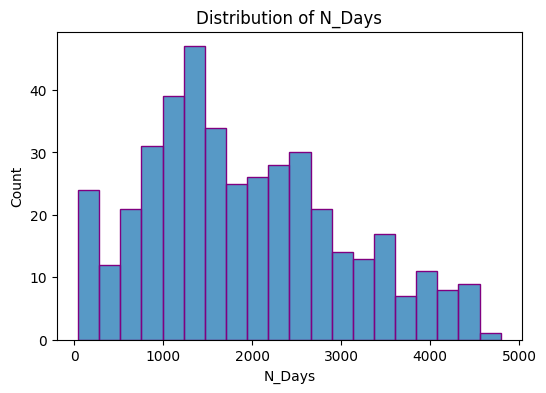

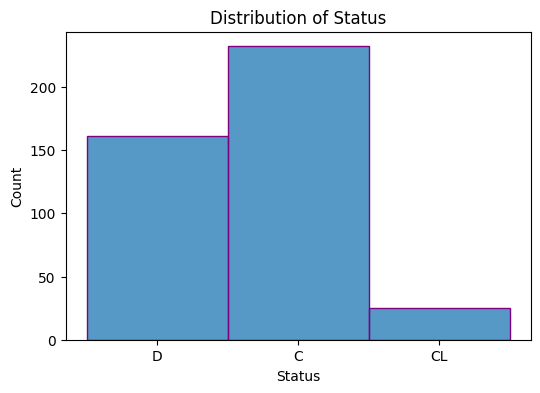

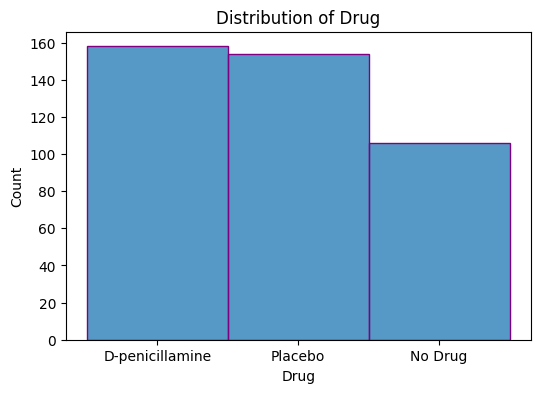

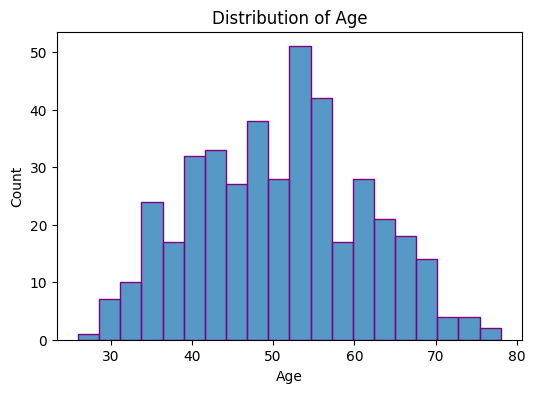

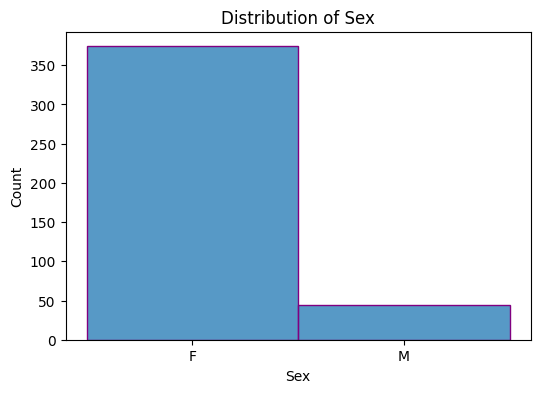

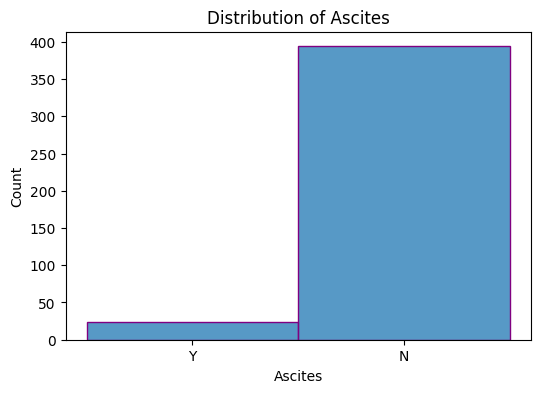

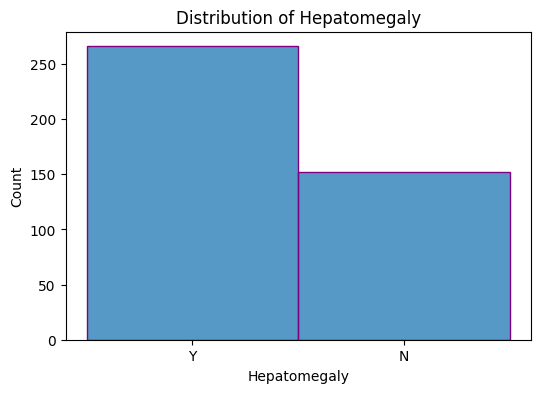

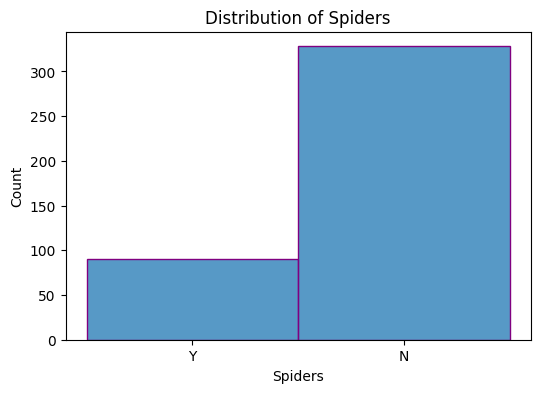

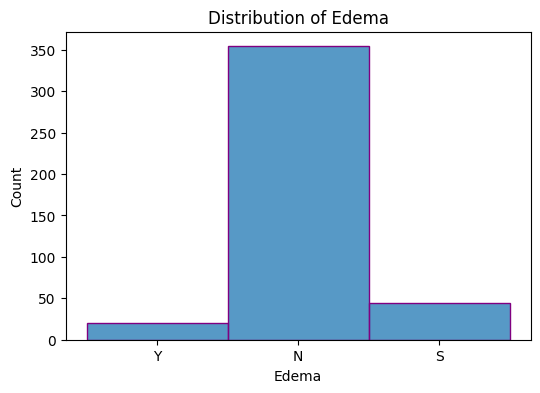

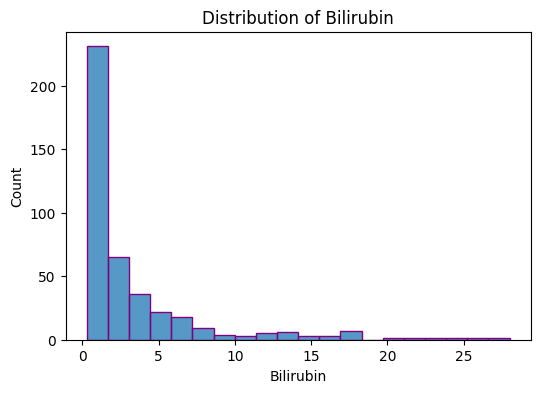

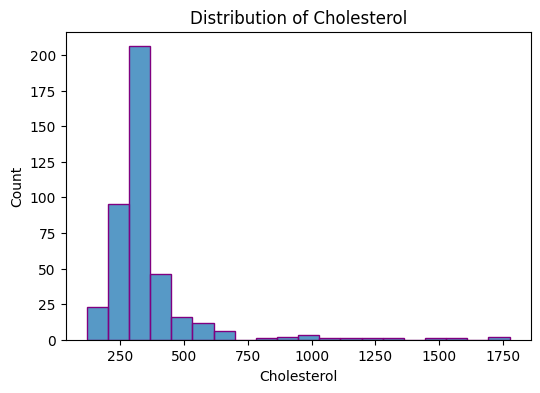

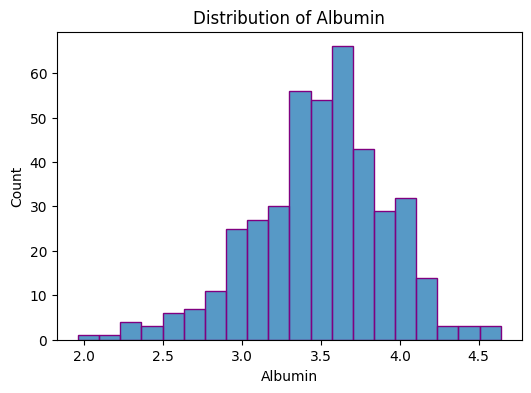

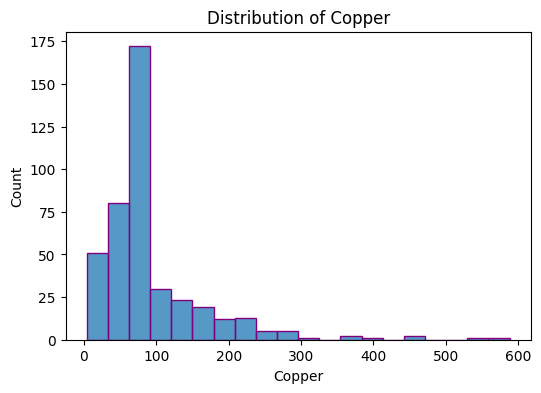

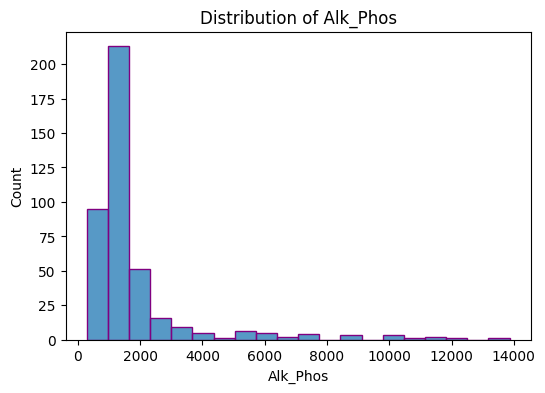

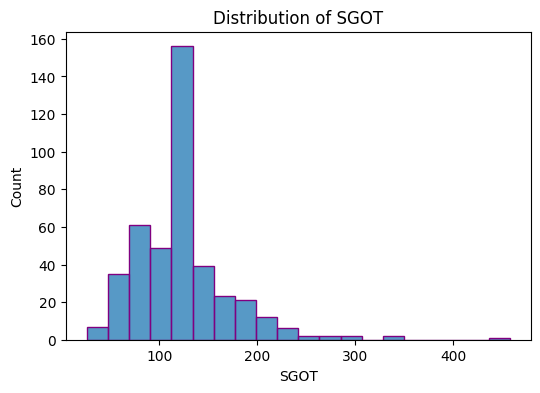

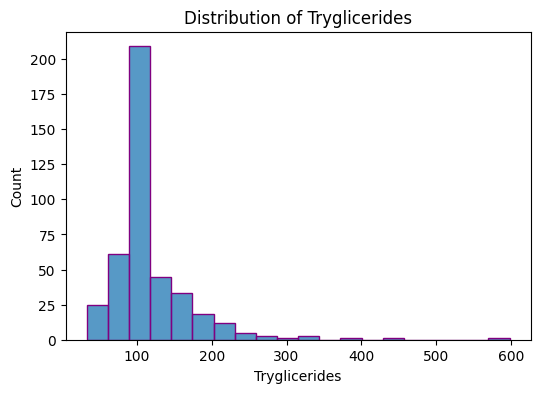

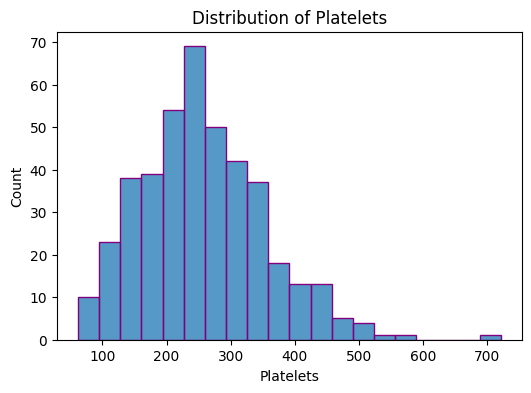

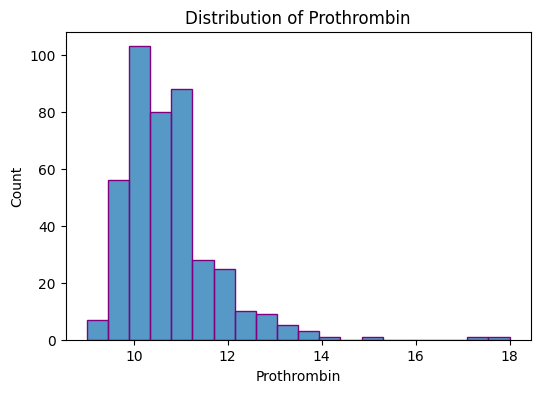

In [20]:
for col in df_cleaned.columns:
    if col != "Stage":
        plt.figure(figsize=(6, 4))
        sns.histplot(data=df_cleaned, x=col, edgecolor="purple", bins=20)
        plt.title(f"Distribution of {col}")
        plt.show()

### Correlation Heatmap

<ipython-input-21-1d7d0a92b3ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


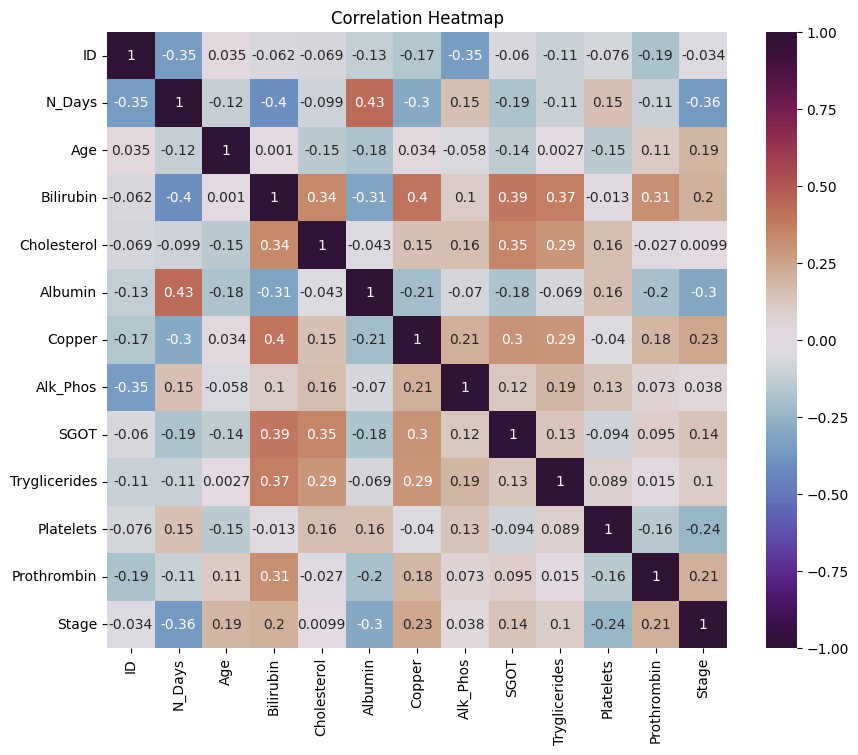

In [21]:
# Calculate and create a correlation matrix
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="twilight_shifted", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

#### Analysis

- A moderate positive relationship (correlation of 0.43) exists between Albumin and N_Days. As Albumin increases, N_Days tends to increase.

- A moderate positive relationship (correlation of 0.4) is observed between Copper and Bilirubin. Higher Copper levels are associated with higher Bilirubin levels.

- A moderate positive relationship (correlation of 0.39) exists between SGOT and Bilirubin. Elevated SGOT levels tend to coincide with higher Bilirubin levels.

- A moderate positive relationship (correlation of 0.37) is observed between Triglycerides and Bilirubin. As Triglyceride levels rise, Bilirubin levels tend to increase.

- A moderate positive relationship (correlation of 0.35) is observed between SGOT and Cholesterol. Higher SGOT levels might be related to higher Cholesterol levels.

- A moderate positive relationship (correlation of 0.34) exists between Cholesterol and Bilirubin. As Cholesterol levels increase, Bilirubin levels also tend to increase.

- A moderate positive relationship (correlation of 0.31) exists between Prothrombin and Bilirubin. Higher Prothrombin levels might be associated with higher Bilirubin levels.

- A moderate positive relationship (correlation of 0.3) is observed between SGOT and Copper. Elevated SGOT levels might coincide with higher Copper levels.

### Multivariate Vizualization

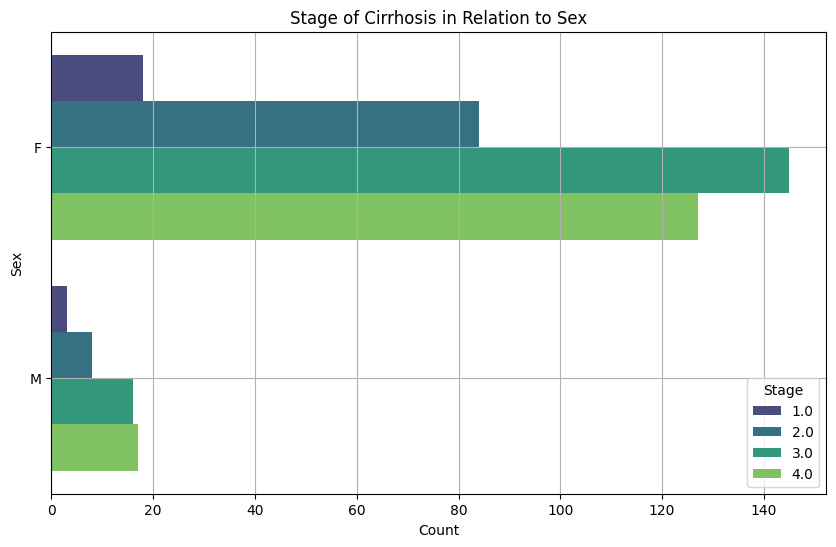

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Sex', hue='Stage', data=df_cleaned, palette="viridis")
plt.title('Stage of Cirrhosis in Relation to Sex')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.legend(title='Stage')
plt.grid(True)
plt.show()

#### Analysis

Consider our bodies to be automobiles, and the liver to be the mechanic who keeps everything operating properly. Cirrhosis of the liver occurs when the engine (liver) becomes damaged and no longer functions properly. When it comes to men and women, their bodies function differently. Women may be more prone than men to develop liver cirrhosis because their bodies handle things more delicately.

For example, when both men and women consume alcohol, women's body may have a more difficult time handling it. It's as though their mechanic (the liver) is having difficulty coping with it. This can lead to additional damage over time, and if the liver is severely injured, it can lead to cirrhosis.

Furthermore, hormones are specific molecules found in women's bodies that might impact how the liver operates. These hormones might sometimes render the liver more prone to injury.

Remember that not all women get liver cirrhosis, and it's not just about being a woman; other factors such as alcohol consumption and overall health also play a role. Just as some automobiles can continue for a long time without difficulties despite being driven frequently, others may develop problems sooner.

In simple terms, women may be more likely to develop liver cirrhosis because their bodies process things differently, similar to having a sensitive engine that requires extra care.

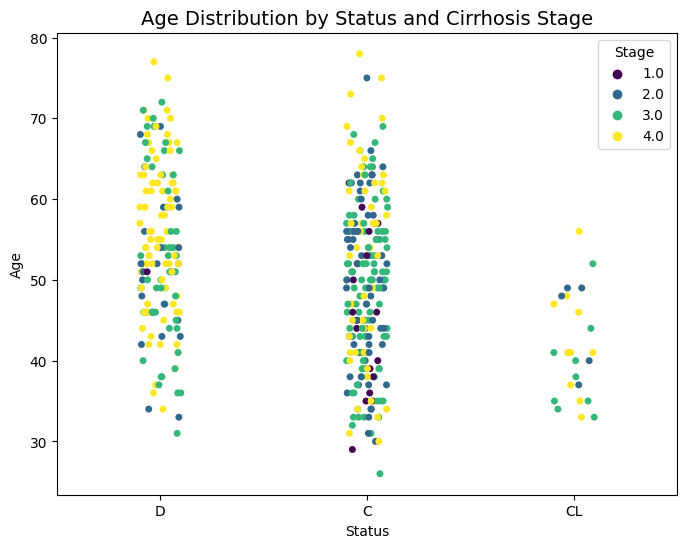

In [25]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_cleaned, x='Status', y='Age', hue='Stage', palette='viridis')
plt.title('Age Distribution by Status and Cirrhosis Stage', fontsize=14)
plt.xlabel('Status')
plt.ylabel('Age')
plt.legend(title='Stage')
plt.show()

#### Analysis

In this picture, we have three different groups of people, and each group is going through a different situation:

1. Some people are doing really well, just like the superheroes in a cool story (we can call them the 'C' group).
2. A few people got better after they had a special treatment for their liver, kind of like a liver superhero power-up (let's call them the 'CL' group).
3. Unfortunately however, some people (we'll call them the 'D' group) are like characters who have reached the end of their story.

What's really interesting is that we see more dots, like little pictures of people, in the 'D' group for stages 3 and 4 of liver cirrhosis. This tells us that more people in the advanced stages of liver cirrhosis did not make it.

The 'CL' group on the other hand does not have many dots. That shows us that not many people from all four stages of liver cirrhosis got better, even after receiveing the special treatment.

In the 'C' group however, we see the superheroes who are still in the story. There are lots of dots for stages 1, 2, and 3 within this group signifying that most people in those stages are still doing okay and are fighting their battle, just like our brave heroes are.